<a href="https://colab.research.google.com/github/OkktaDan/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise-4/Exercise-4B/Octaviano_Exercise4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [365]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [366]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: >

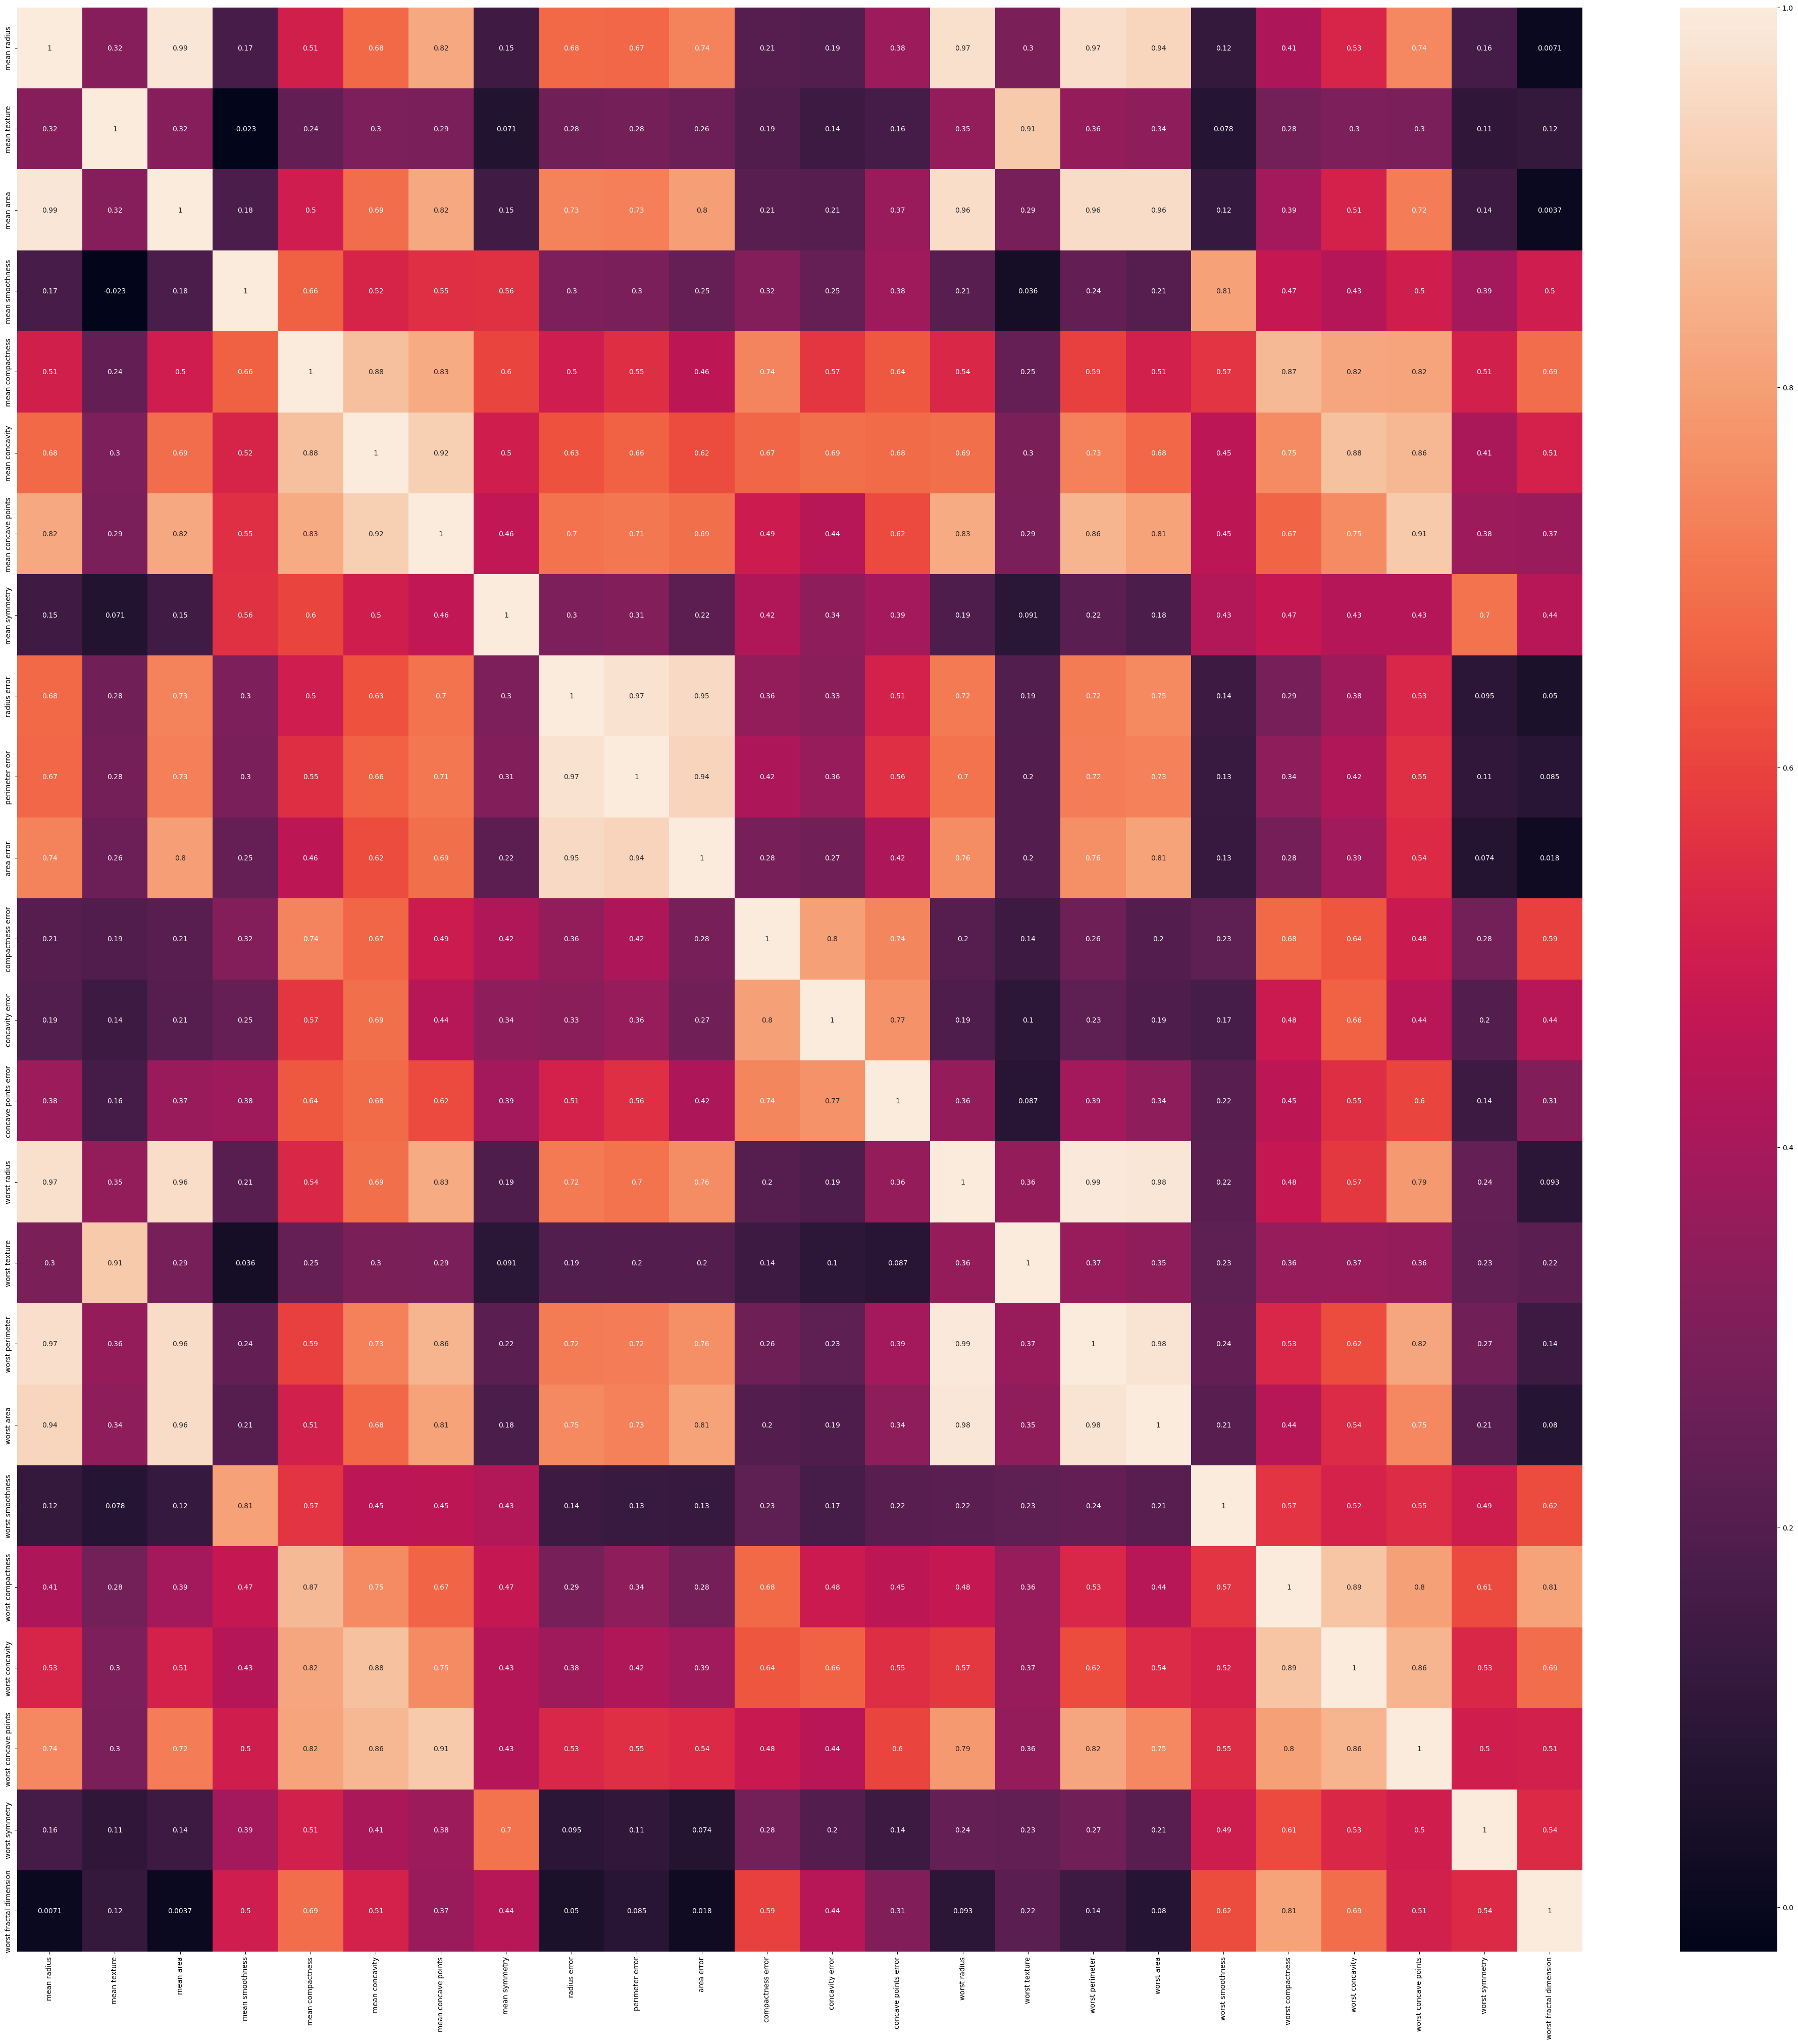

In [368]:
_X = df.drop('target', axis=1)

import seaborn as sns
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(X.corr(), annot=True, ax=ax)

In [369]:
X = _X.drop(columns=["mean perimeter", "fractal dimension error", "smoothness error", "texture error", "symmetry error", "mean fractal dimension"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean area                569 non-null    float64
 3   mean smoothness          569 non-null    float64
 4   mean compactness         569 non-null    float64
 5   mean concavity           569 non-null    float64
 6   mean concave points      569 non-null    float64
 7   mean symmetry            569 non-null    float64
 8   radius error             569 non-null    float64
 9   perimeter error          569 non-null    float64
 10  area error               569 non-null    float64
 11  compactness error        569 non-null    float64
 12  concavity error          569 non-null    float64
 13  concave points error     569 non-null    float64
 14  worst radius             5

1. Perform scaling `(10 pts)`

In [370]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

2. Perform dimensionality reduction using PCA `(10 pts)`

In [371]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)
X_reduced.shape

(569, 3)

3. Get the total explained variance `(5 pts)`

In [372]:
explained_variance = pca.explained_variance_ratio_

PC1 = explained_variance[0]
print("PC1: ", PC1)
PC2 = explained_variance[1]
print("PC2: ", PC2)
PC3 = explained_variance[2]
print("PC3: ", PC3)

print("sum variance:", explained_variance.sum())

PC1:  0.5159865426862728
PC2:  0.17018590088951238
PC3:  0.08158442596504449
sum variance: 0.7677568695408296


4. Plot the explained variances of each principal component `(5 pts)`

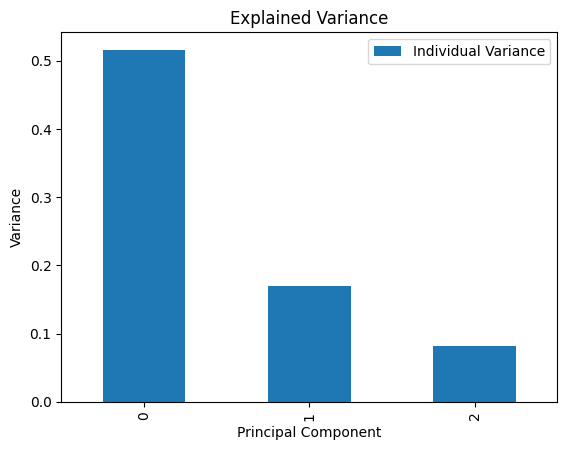

In [373]:
pd.DataFrame(explained_variance).plot.bar()
plt.legend(["Individual Variance"])
plt.xlabel("Principal Component")
plt.ylabel("Variance")
plt.title("Explained Variance")
plt.show()

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

In [374]:
import plotly.express as px

plot = pd.DataFrame({
    "PC1": X_reduced[:, 0],
    "PC2": X_reduced[:, 1],
    "PC3": X_reduced[:, 2],
    "target": df["target"]
})

fig = px.scatter_3d(plot, x="PC1", y="PC2", z="PC3", color="target", title="3D Scatter Plot")
fig.update_traces(marker=dict(size=2))
fig.show()

6. Perform clustering using any clustering algorithm `(10 pts)`

In [379]:
from sklearn.cluster import KMeans
import plotly.express  as px
import plotly.graph_objects as go

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(X_reduced)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,6))

plot = pd.DataFrame({
    "PC1": X_reduced[:, 0],
    "PC2": X_reduced[:, 1],
    "PC3": X_reduced[:, 2],
    "label": labels
})

fig = px.scatter_3d(plot,x="PC1", y="PC2", z="PC3", color="label", title="3D Scatter Plot")
fig.add_traces(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(size=6, color="red", symbol="x"),
        name="Centroids"
    )
)
fig.update_traces(marker=dict(size=2))
fig.show()

<Figure size 800x600 with 0 Axes>

7. View the loading scores of each principal component `(5 pts)`

In [377]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=X.columns)
loading_matrix

,PC1,PC2,PC3
mean radius,0.800929,-0.513631,0.087775
mean texture,0.382661,-0.151677,0.505912
mean area,0.807752,-0.536096,0.048154
mean smoothness,0.520195,0.457545,-0.012543
mean compactness,0.868965,0.381042,-0.058871
mean concavity,0.939916,0.144707,-0.116289
mean concave points,0.951855,-0.061896,-0.013851
mean symmetry,0.501841,0.461722,-0.042811
radius error,0.747749,-0.404112,-0.292345
perimeter error,0.766867,-0.362158,-0.312239
